# Jaime Ariel Chitay
# 19002065

"![back](back.jpeg)"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Creacion de funciones de apoyo:

In [2]:
def setPesos(k1,k2,k3):
    return (np.random.normal(0, 0.1, (X.shape[1]+1, k1)),
            np.random.normal(0, 0.1, (k1+1,k2 )),
            np.random.normal(0, 0.1, (k2+1, k3)))

def columnBias(x):
    return np.append(x,np.ones((x.shape[0],1)), axis=1)

def actRelu(x):
    return np.maximum(0.0, x)

def derivRelu(x):
    return np.array(X>0,dtype = np.float)

Se utilizara una arquitectura de dos capas ocultas, cada una con dos neuronas. Para cada neurona se utilizará un Bias.

La semántica de la matriz de pesos es la siguiente

Columnas = numero de Neuronas en cada capa.
Filas = numero de parametros por neurona.

In [3]:
#Datos de entrenamiento:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

k01 = 2 #Numero de nuronas en la primera capa
k02 = 2 #Numero de neuronas en la segunda capa
k03 = 1 #Numero de neuronas en la capa de salida

#Inicializacion de las metrices de pesos:
w01, w02, w03 = setPesos(k01,k02,k03)

# Implementacion de feed forward propagation:

In [4]:
def feedForward(x,w1,w2,w3):
    '''
    Funcion que recibe como entrada el vector de datos de entrenamiento 
    y devuelve el resultado de realizar feedForward
    '''
    #Primera capa oculta
    Z02 = np.matmul(columnBias(x),w1)
    #Funcion de activacion ReLu:
    a02 = actRelu(Z02)  #Vector de 2x4 
    
    #Segunda capa oculta
    Z03 = np.matmul(columnBias(a02),w2)
    #Funcion de activacion ReLu:
    a03 = actRelu(Z03)  #Vector de 2x4 
    
    #Tercera capa, salida
    Z04 = np.matmul(columnBias(a03),w3)
    #No se aplica funcion de activacion a la ultima capa:
    a04 = np.copy(Z04)
    
    return (a04,Z04,a03,Z03,a02,Z02)

In [5]:
feedForward(X[0:1],w01,w02,w03)[0]

array([[0.01724094]])

#### Creacion de la funcion de costo:

Los valores de errDel corresponden a la siguiente ecuacion:

"![costo](ecuacion1.png)"

"![costDeriv](costDeriv.png)"

In [6]:
def costFunction(x,y,w1,w2,w3):
    
    #Trace del error para cada epoch
    allCosto = np.mean(np.power(feedForward(x,w1,w2,w3)[0] - y, 2)) / 2
    
    
    #Por cambiar 
    dCost01 = np.zeros_like(w1)
    dCost02 = np.zeros_like(w2)
    dCost03 = np.zeros_like(w3)
       
    #Ahora, aplicamos backpropagation para cada ejemplo puntual:
    for i in range(len(y)):
        #Primero: Forward propagation:
        a04,Z04,a03,Z03,a02,Z02 = feedForward(x[i:i+1],w1,w2,w3)
        
        #Ahora obtenemos el error para ese unico ejemplo, y aplicamos backpropagation para cada ejemplo:
        minusDel04 = a04 - Y[i]
        #Eliminamos el bias de la matriz de pesos:
        minusDel03 = np.matmul(w3[0:2:,],minusDel04)*Z03.T
        minusDel02 = np.matmul(w2[0:2:,],minusDel03)*Z02.T
        
        dCost03 += np.matmul(a04,minusDel04)
        dCost02 += np.matmul(a03,minusDel03)
        dCost01 += np.matmul(x[i:i+1],minusDel02)
        
    return (allCosto,dCost01/4,dCost02/4,dCost03/4)

In [7]:
def trainingFunction(X, Y,learnRate, epochs):
    # Acumulacion del error Total:
    errorTime = []
    
    # Matrices de pesos sinápticos aleatorias
    w01, w02, w03 = setPesos(k01,k02,k03)
    
    # Iterar sobre el número de epochs
    for i in range(epochs):    
        # Aplicando backpropagation y funcion de costo:
        error, w1Train, w2Train, w3Train = costFunction(X, Y, w01, w02, w03)
        
        #Almacenando los pesos en un arreglo:
        errorTime.append(error)
        
        # Entranmiento de las matrices de pesos
        w01 += -learnRate * w1Train
        w02 += -learnRate * w2Train
        w03 += -learnRate * w3Train

    return w01, w02, w03, errorTime

Para tener una pequeña visualizacion del error con respecto a las iteraciones, se procede a graficarlas:
Primera corrida:

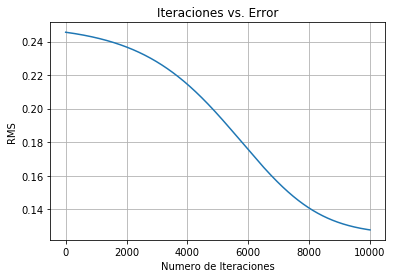

In [8]:
w1Train, w2Train, w3Train, errors = trainingFunction(X, Y, 0.001, 10000)
fig, ax = plt.subplots()
ax.plot(np.arange(len(errors)), np.array(errors))
ax.set(xlabel='Numero de Iteraciones', ylabel='RMS',
       title='Iteraciones vs. Error')
ax.grid()
plt.show()

Text(0, 0.5, 'x2')

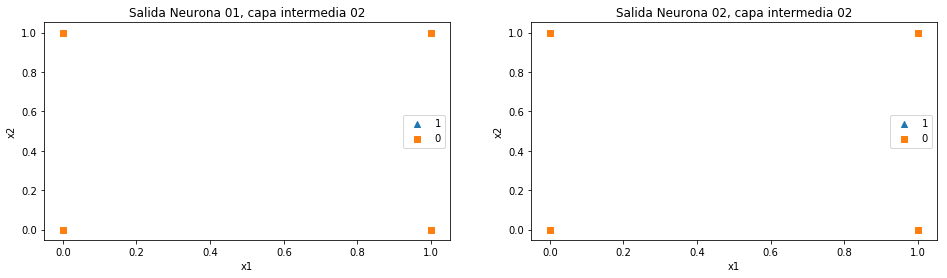

In [9]:

a04,Z04,a03,Z03,a02,Z02 = feedForward(X,w1Train,w1Train,w1Train)
X01 = X[:,0]
X02 = X[:,1]

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.scatter(X01[a02[:,0]>=1], X02[a02[:,0]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,0]<1], X02[a02[:,0]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 01, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(1,2,2)
plt.scatter(X01[a02[:,1]>=1], X02[a02[:,1]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,1]<1], X02[a02[:,1]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 02, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
w1Train, w2Train, w3Train, errors = trainingFunction(X, Y, 0.00001, 10000)
fig, ax = plt.subplots()
ax.plot(np.arange(len(errors)), np.array(errors))
ax.set(xlabel='Numero de Iteraciones', ylabel='RMS',
       title='Iteraciones vs. Error')
ax.grid()
plt.show()

In [ ]:
a04,Z04,a03,Z03,a02,Z02 = feedForward(X,w1Train,w1Train,w1Train)
X01 = X[:,0]
X02 = X[:,1]

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.scatter(X01[a02[:,0]>=1], X02[a02[:,0]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,0]<1], X02[a02[:,0]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 01, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(1,2,2)
plt.scatter(X01[a02[:,1]>=1], X02[a02[:,1]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,1]<1], X02[a02[:,1]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 02, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
w1Train, w2Train, w3Train, errors = trainingFunction(X, Y, 0.00001, 10000)
fig, ax = plt.subplots()
ax.plot(np.arange(len(errors)), np.array(errors))
ax.set(xlabel='Numero de Iteraciones', ylabel='RMS',
       title='Iteraciones vs. Error')
ax.grid()
plt.show()

In [ ]:
a04,Z04,a03,Z03,a02,Z02 = feedForward(X,w1Train,w1Train,w1Train)
X01 = X[:,0]
X02 = X[:,1]

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.scatter(X01[a02[:,0]>=1], X02[a02[:,0]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,0]<1], X02[a02[:,0]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 01, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(1,2,2)
plt.scatter(X01[a02[:,1]>=1], X02[a02[:,1]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,1]<1], X02[a02[:,1]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 02, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
w1Train, w2Train, w3Train, errors = trainingFunction(X, Y, 0.001, 10000)
fig, ax = plt.subplots()
ax.plot(np.arange(len(errors)), np.array(errors))
ax.set(xlabel='Numero de Iteraciones', ylabel='RMS',
       title='Iteraciones vs. Error')
ax.grid()
plt.show()

In [ ]:
a04,Z04,a03,Z03,a02,Z02 = feedForward(X,w1Train,w1Train,w1Train)
X01 = X[:,0]
X02 = X[:,1]

plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.scatter(X01[a02[:,0]>=1], X02[a02[:,0]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,0]<1], X02[a02[:,0]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 01, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

plt.subplot(1,2,2)
plt.scatter(X01[a02[:,1]>=1], X02[a02[:,1]>=1], marker='^', label='1')
plt.scatter(X01[a02[:,1]<1], X02[a02[:,1]<1], marker='s', label='0')
plt.legend()
plt.title("Salida Neurona 02, capa intermedia 02")
plt.xlabel("x1")
plt.ylabel("x2")

# Conclusiones:
Vemos como incluso para ciertas configuraciones iguales, se obtienen valores menores del MSE. Esto se debe a los valores iniciales de las matrices de pesos, dado que son aleatorios, los mismos pueden ubicar el sistema a puntos a veces mas cercanos del minimo local de la funcion de error, e inclusive en un minimo local completamente diferente.

A pesar de los cambios que provocan matrices de pesos distintas, la salida de las neuronas en la capa intermedia sigue siendo la misma.

Dado la cantidad tan pequeña de ejemplos, el modelo sufre de "overfitting", aunque tal como se mencionó en clase, no se necesita de un modelo profundo para modelar este tipo de funciones.